In [1]:
import pandas as pd
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('topic-importances-data.csv')
df = df.drop('Notes', axis=1).drop(0)
df = df.astype({'Data analyst roles':'int32',
                'Data scientist roles':'int32',
                'Data engineer roles':'int32'})
df

,Week,Material,Data analyst roles,Data scientist roles,Data engineer roles
1,1,Excel,4,4,2
2,2,VBA Scripting,2,2,1
3,3,Python,3,4,4
4,4,Pandas,3,4,3
5,5,Matplotlib,3,4,2
6,6,Python APIs,3,4,4
7,9,SQL,4,4,4
8,10,Advanced Data Storage and Retrieval,1,3,4
9,11,Web,1,2,2
10,12,Web Scraping and Document Databases,1,3,3


In [3]:
import matplotlib.pyplot as plt

def add_circle(x, y, size, alpha):
    plt.gca().add_patch(plt.Circle((x, y), size, color='r', alpha=alpha))

[]

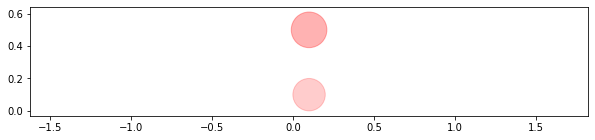

In [6]:
plt.figure(figsize=(10,2))

add_circle(.1, .5, .11, .3)
add_circle(.1, .1, .1, .2)

plt.gca().set_aspect('equal', adjustable='datalim')  # prevents circles from being ovals
plt.gca().plot()  # makes axis update
